In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 400
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "training",
    shuffle = True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE 
)

Found 4437 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['all motor vehicle prohibited',
 'axle road limit',
 'barrier ahead sign',
 'bullock cart and hand cart prohibited sign',
 'cattle traffic sign',
 'compulsory ahead only sign',
 'compulsory cycle track sign',
 'compulsory keep left sign',
 'compulsory keep right sign',
 'speed limit 30']

(32, 400, 400, 3)
[7 1 3 4 0 5 5 3 5 2 0 5 6 4 4 7 7 6 3 2 8 7 8 8 8 5 5 7 4 9 0 0]


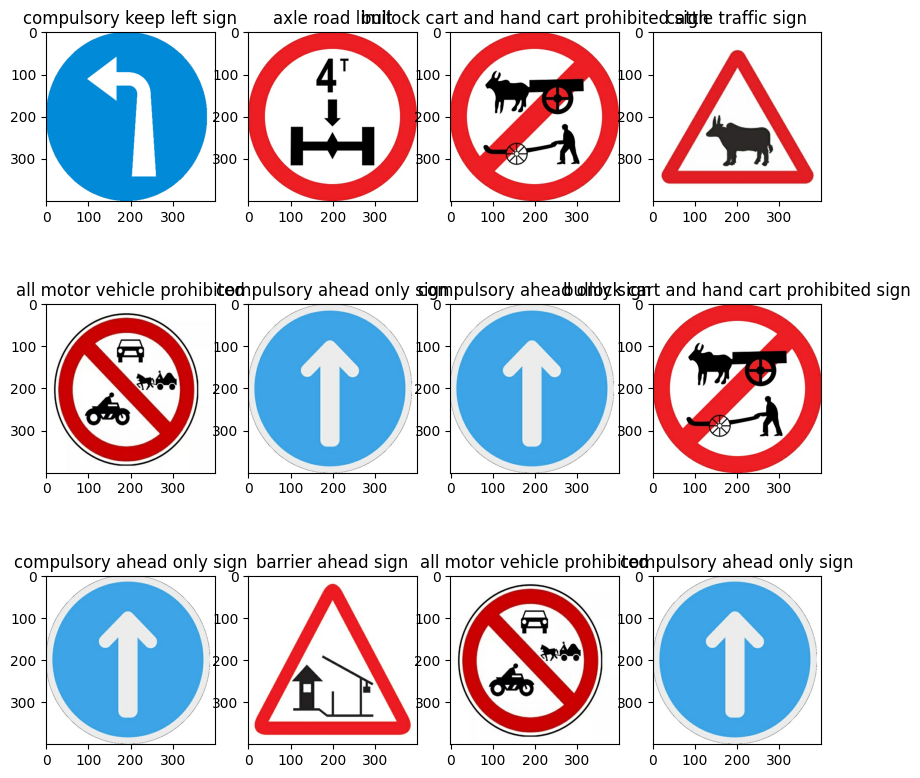

In [5]:
plt.figure(figsize=(10,10))
for image_batch, image_labels in dataset.take(1):
    print(image_batch.shape)
    print(image_labels.numpy())
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch [i] . numpy() . astype("uint8"))
        plt.title(class_names[image_labels[i]])
        

In [6]:
train_size = 0.8
len(dataset) * train_size

111.2

In [7]:
train_ds = dataset.take(54)
len(train_ds)

54

In [8]:
test_ds = dataset.skip(54)
len(test_ds)

85

In [9]:
val_size = 0.1
len(dataset)* val_size

13.9

In [10]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

79

In [12]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000 ):
    assert (train_split + val_split + test_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
        train_size = int (train_split*ds_size)
        val_size = int(val_split*ds_size)
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size). take(val_size)
        test_ds = ds.skip(train_size). skip(val_size)  
    return train_ds, val_ds, test_ds


In [13]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

111

In [15]:
len(val_ds)

13

In [16]:
len(test_ds)

15

In [17]:
train_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)
val_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)
test_ds.cache(). shuffle(1000). prefetch(buffer_size= tf.data.AUTOTUNE)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
for image_batch, image_labels in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [19]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classess=10
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classess, activation='softmax'), 
])

model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 400, 400, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 400, 400, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 398, 398, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 199, 199, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 197, 197, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 98, 98, 64)         0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    
)

In [24]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/10
111/111 [==============================] - 343s 3s/step - loss: 3.3522 - accuracy: 0.6947 - val_loss: 0.1748 - val_accuracy: 0.8741
Epoch 2/10
111/111 [==============================] - 333s 3s/step - loss: 0.1973 - accuracy: 0.8673 - val_loss: 0.2154 - val_accuracy: 0.8558
Epoch 3/10
111/111 [==============================] - 333s 3s/step - loss: 0.1835 - accuracy: 0.8712 - val_loss: 0.1786 - val_accuracy: 0.7668
Epoch 4/10
111/111 [==============================] - 336s 3s/step - loss: 0.1891 - accuracy: 0.8647 - val_loss: 0.2047 - val_accuracy: 0.7548
Epoch 5/10
111/111 [==============================] - 335s 3s/step - loss: 0.1857 - accuracy: 0.8664 - val_loss: 0.1836 - val_accuracy: 0.8870
Epoch 6/10
111/111 [==============================] - 334s 3s/step - loss: 0.1869 - accuracy: 0.8630 - val_loss: 0.1767 - val_accuracy: 0.8606
Epoch 7/10
111/111 [==============================] - 333s 3s/step - loss: 0.1846 - accuracy: 0.8701 - val_loss: 0.1459 - val_accuracy: 0.9014

In [25]:
scores =model.evaluate(test_ds)

15/15 [==============================] - 22s 536ms/step - loss: 0.2061 - accuracy: 0.8934


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc = history.history['accuracy']
loss = history.history['loss']


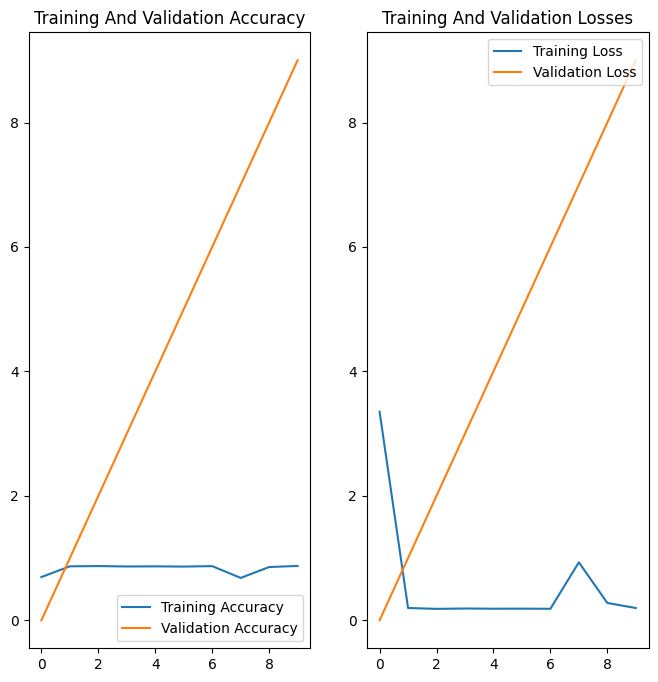

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS), label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Losses')
plt.show()

First Image to Predict
Actual Label: compulsory cycle track sign
1/1 [==============================] - 1s 1s/step
Predict Label: compulsory cycle track sign


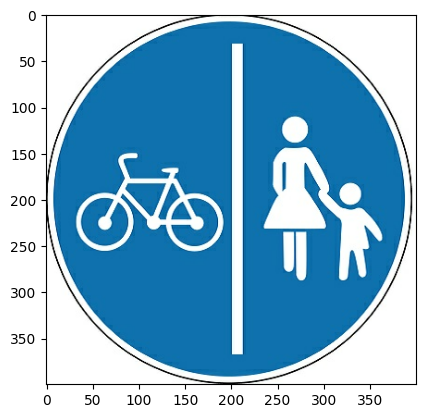

In [30]:
import numpy as np
for image_batch, image_labels in test_ds.take(1):
    first_image = image_batch[0]. numpy().astype("uint8")
    print('First Image to Predict')
    plt.imshow(first_image)
    print('Actual Label:',class_names[image_labels[0]. numpy()])
    
    batch_prediction = model.predict(image_batch)
    print('Predict Label:', class_names[np.argmax(batch_prediction[0])])
    

In [33]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #create a batch
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 58ms/step


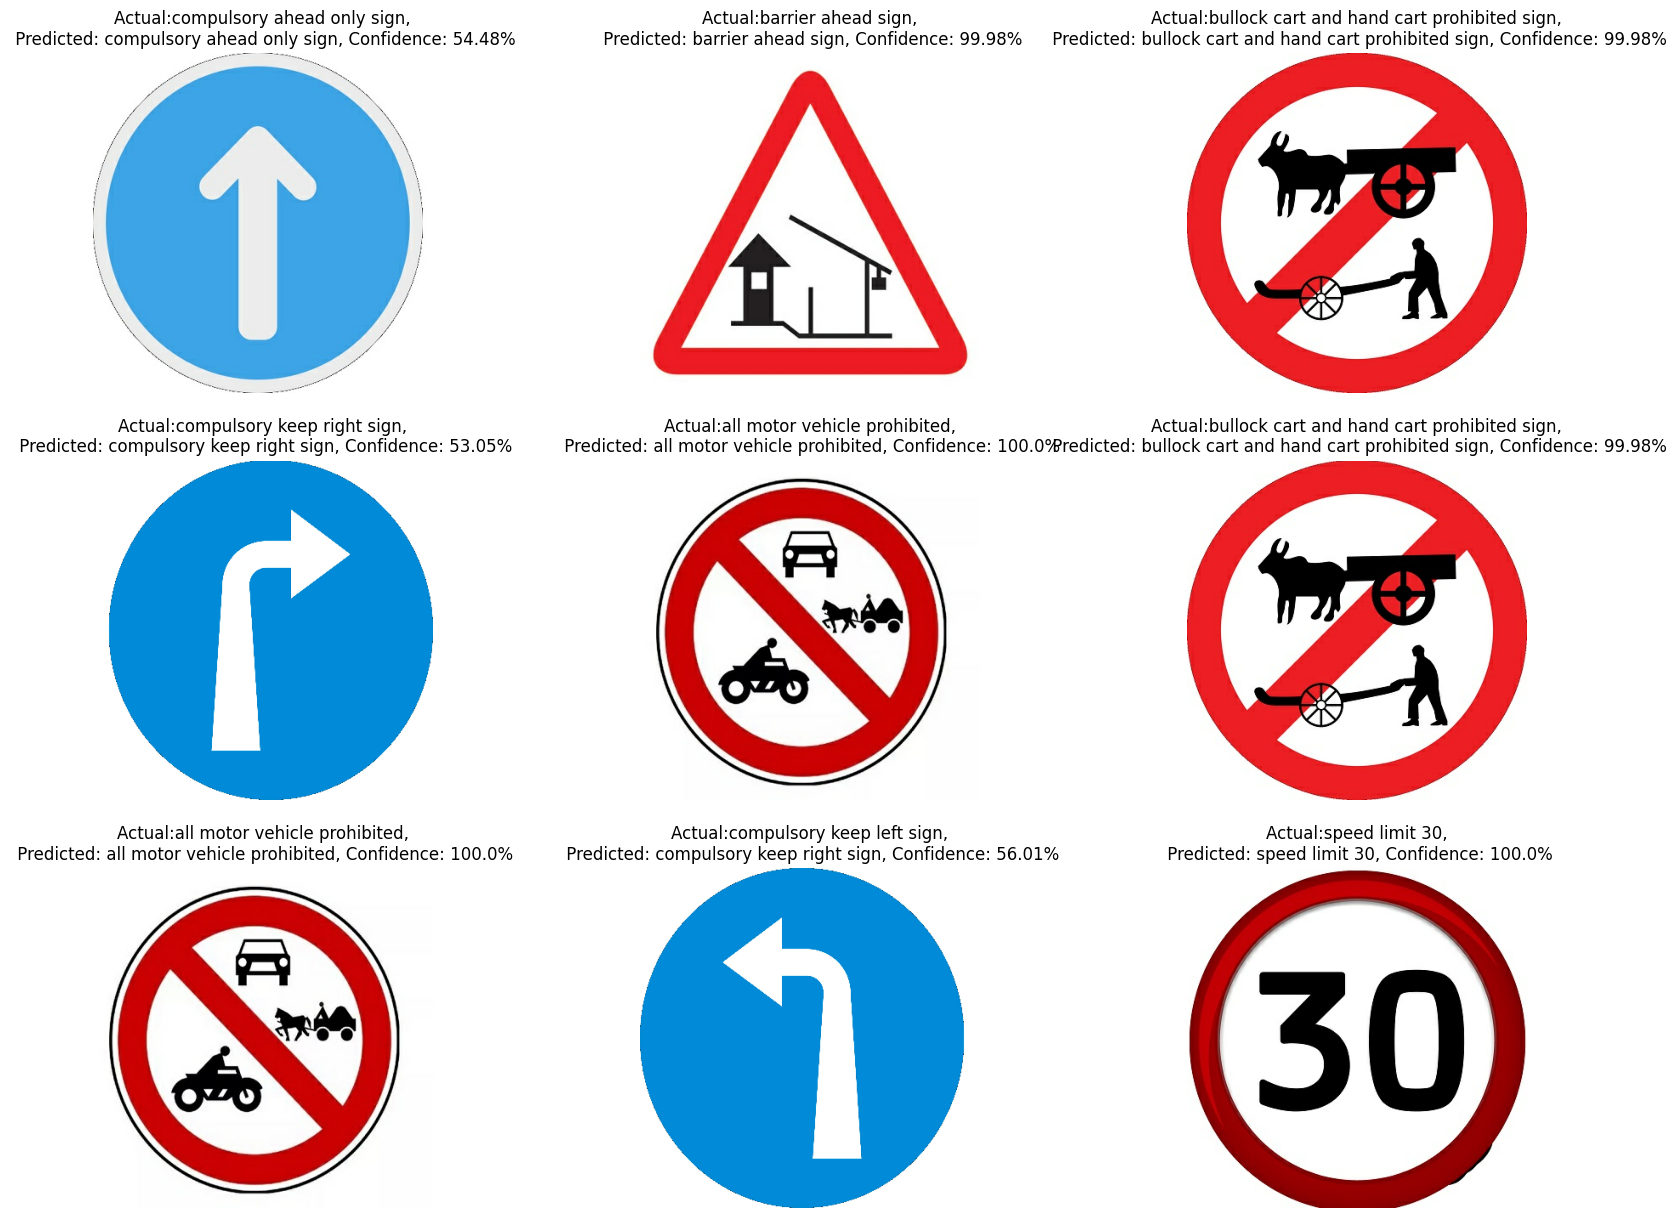

In [32]:
plt.figure(figsize=(20, 15))
for images, labels in test_ds.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}, Confidence: {confidence}%")
        plt.axis('off')

In [ ]:
model_version=23
model.save(f"../models/{model_version}")